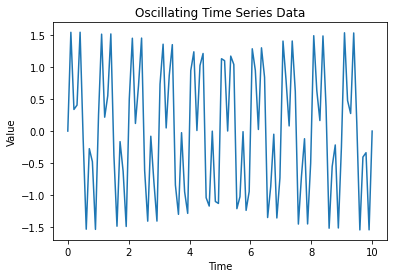

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 生成存在明显震荡的时序数据样例
time = np.linspace(0, 10, 100)
oscillating_data = np.sin(2 * np.pi * 1 * time) + np.sin(2 * np.pi * 3 * time)

# 绘制时序数据图像
plt.plot(time, oscillating_data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Oscillating Time Series Data')
plt.show()

Oscillation Strength: 0.000499999999999996


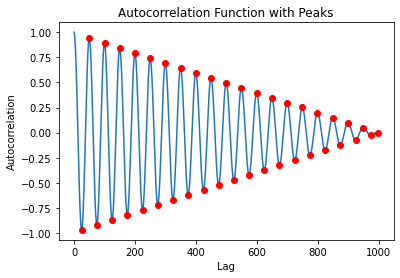

0.9714733117645267


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statsmodels.tsa.stattools import acf
from scipy.signal import argrelextrema

# 示例时序数据，可以替换为您的实际数据
#data = np.sin(np.linspace(0, 20 * np.pi, 100))
# 生成存在明显震荡的时序数据样例
# 生成时间点
time = np.linspace(0, 10, 1000)

# 生成正弦信号
amplitude = 1.0  # 振幅
frequency = 2.0  # 频率
phase = 0.0      # 相位
noise_level = 0.05  # 噪声水平

# 生成无阻尼低噪声正弦信号
sinusoidal_signal = amplitude * np.sin(2 * np.pi * frequency * time + phase)
data = sinusoidal_signal + np.random.normal(0, noise_level, size=len(time))
# 计算自相关函数
acf_values = acf( data,nlags=1000)

# 绘制自相关函数图像
# plt.plot(acf_values)
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.title('Autocorrelation Function')
# plt.show()

# 计算振荡强度指标，这里取前10个滞后作为主要周期
oscillation_strength = np.mean(acf_values)  # 排除滞后0
print("Oscillation Strength:", oscillation_strength)
# 寻找自相关函数的顶点列表
peaks, _ = find_peaks(acf_values)
# 找到自相关函数的极大值点
maxima_indices = argrelextrema(acf_values, np.greater)

# 找到自相关函数的极小值点
minima_indices = argrelextrema(acf_values, np.less)
indices = np.append(maxima_indices,minima_indices)
indices = sorted(indices)
# 绘制自相关函数图像和顶点
plt.plot(acf_values)
plt.plot(indices, acf_values[indices], 'ro')  # 用红色圆点标记顶点
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function with Peaks')
plt.show()
n = len(indices)
result = 0
for i in range(3, n):
    a = acf_values[i] / acf_values[i-2]
    w1 = i*np.square(acf_values[i] + acf_values[i-2])
    w2 = 0
    for y in range(3, n):
        w2 += y*np.square(acf_values[y] + acf_values[y-2])
    result = result + a*w1/w2

print(result)

Estimated Mean Oscillation Period: 9.894736842105264
Estimated Std Deviation of Oscillation Period: 0.22329687826943606
s 0.7364879493798944


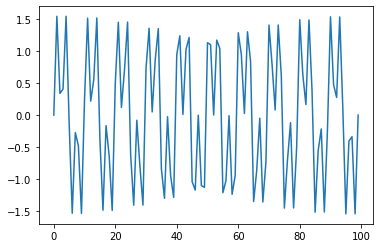

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_oscillation_period(data):
    # 识别振荡过零点
    zero_crossings = np.where(np.diff(np.sign(data)))[0]

    # 计算震荡周期
    periods = np.diff(zero_crossings)

    # 计算平均值和标准差
    mean_period = 2*np.mean(periods)
    std_deviation_period = np.std(periods)

    return mean_period, std_deviation_period

# 示例时序数据，可以替换为您的实际数据
time = np.linspace(0, 10, 100)
data = np.sin(2 * np.pi * 1 * time) + np.sin(2 * np.pi * 3 * time)

mean_period, std_deviation_period = estimate_oscillation_period(data)
print("Estimated Mean Oscillation Period:", mean_period)
print("Estimated Std Deviation of Oscillation Period:", std_deviation_period)
print("s", mean_period/3*std_deviation_period)
plt.plot(data)
plt.show()

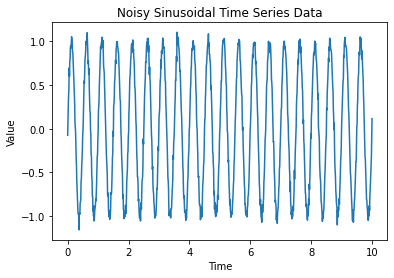

In [2]:
import numpy as np

# 生成时间点
time = np.linspace(0, 10, 1000)

# 生成正弦信号
amplitude = 1.0  # 振幅
frequency = 2.0  # 频率
phase = 0.0      # 相位
noise_level = 0.05  # 噪声水平

# 生成无阻尼低噪声正弦信号
sinusoidal_signal = amplitude * np.sin(2 * np.pi * frequency * time + phase)
noisy_signal = sinusoidal_signal + np.random.normal(0, noise_level, size=len(time))

# 绘制时序数据图像
import matplotlib.pyplot as plt
plt.plot(time, noisy_signal)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Noisy Sinusoidal Time Series Data')
plt.show()
